In [1]:
import pandas as pd

# Specify the file path
file_path = "dataset.xlsx"  # Adjust if the file name is different

# Read the "Data" sheet from the Excel file
data = pd.read_excel(file_path, sheet_name="Data", header=None)  # Using header=None for raw structure

In [2]:
# Adjust display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Show full width of columns
pd.set_option('display.width', 1000)  # Adjust the display width

In [3]:
# Print the first 5 rows in markdown format
print(data.head().to_markdown(index=False))

| 0         | 1        | 2             | 3           | 4   | 5   | 6          | 7        | 8        | 9              | 10                | 11             | 12       | 13                                                                  | 14   | 15   | 16                              | 17      | 18                 | 19                | 20       | 21                | 22                | 23        | 24            | 25                     | 26                  | 27                   | 28               | 29                | 30                   | 31       | 32                 | 33                 | 34                 | 35                 | 36                 | 37                 | 38                 | 39                 | 40                 | 41         | 42                | 43                 | 44   | 45                | 46     | 47         | 48   | 49   | 50   | 51   | 52           | 53         | 54          | 55              | 56           | 57            |
|:----------|:---------|:------

In [4]:
data.iloc[0] = data.iloc[0].fillna('')
data.iloc[1] = data.iloc[1].fillna('')

# Combine the two rows to create headers
data.columns = [f"{str(data.iloc[0, col])} {str(data.iloc[1, col])}".strip() for col in range(data.shape[1])]

# Drop the first two rows (now part of headers)
data = data[2:].reset_index(drop=True)

# Display the cleaned dataset
print(data.head().to_markdown(index=False))

|   Condition | Time     |   Activity code |   Participant |   Sex |   Age |   Bodymasskg |   Heightcm |   Bodyfat% |   VO2peakmlkgmin |   Acclimationstatus |   Trainingstatus |   Clothing |   Environmental temperature (chamber or cooling area outside chamber) Humidity |   Temp |   Wind |   Environmental (Inside clothing)  Tfront |   Rhfront |   Tback |   Rhback |   Activity workrest |   OxygenConsumption ml.kg.min |   Treadmillsettings Speedkm.hr-1 |   Gradient% |   Solar present |   Solar radiation (W.m2) Overall (1.00-1.50m) |   Middle (1.00-1.50m) |   Overall (1.00-1.70m) |   SweatProductionL |   Corerectal |      Δcore |   SkinTemp abdomen |   SkinTemp calf |   SkinTemp chest |   SkinTemp foot |   SkinTemp hand |   SkinTemp head |   SkinTemp lower arm |   SkinTemp lower back |   SkinTemp thigh |   SkinTemp upper arm |   SkinTemp upper back |   InsulatedskinTemp Ins skin |    Tamb |    BR |      HR |   HRtype |   Perceptual TS |     TC |     TP |   SW |   RPE |   R-Rintmanual |   S

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17264 entries, 0 to 17263
Data columns (total 58 columns):
 #   Column                                                                        Non-Null Count  Dtype 
---  ------                                                                        --------------  ----- 
 0   Condition                                                                     17264 non-null  object
 1   Time                                                                          17264 non-null  object
 2   Activity code                                                                 17264 non-null  object
 3   Participant                                                                   17264 non-null  object
 4   Sex                                                                           17264 non-null  object
 5   Age                                                                           17264 non-null  object
 6   Bodymasskg                            

In [6]:
import numpy as np

# Define a function to convert object columns to appropriate types
def convert_column_types(df):
    numeric_columns = [
        'Condition', 'Activity code', 'Participant', 'Sex', 'Age', 'Bodymasskg', 'Heightcm',
        'Bodyfat%', 'VO2peakmlkgmin', 'Acclimationstatus', 'Trainingstatus', 'Clothing',
        'Temp', 'Wind', 'Rhfront', 'Tback', 'Rhback', 'Activity workrest','OxygenConsumption ml.kg.min',
        'Treadmillsettings Speedkm.hr-1', 'Gradient%', 'Solar present',
        'Solar radiation (W.m2) Overall (1.00-1.50m)', 'Middle (1.00-1.50m)',
        'Overall (1.00-1.70m)', 'SweatProductionL', 'Corerectal', 'Δcore',
        'SkinTemp abdomen', 'SkinTemp calf', 'SkinTemp chest', 'SkinTemp foot',
        'SkinTemp hand', 'SkinTemp head', 'SkinTemp lower arm', 'SkinTemp lower back',
        'SkinTemp thigh', 'SkinTemp upper arm', 'SkinTemp upper back',
        'InsulatedskinTemp Ins skin', 'Tamb', 'BR', 'HR', 'HRtype',
        'Perceptual TS', 'TC', 'TP', 'SW', 'RPE', 'R-Rintmanual', 'SDRRManual',
        'HRV RMSSDmanual', 'R-R intsoftware', 'SDRRSoftware', 'RMSSDSoftware'
    ]

    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, replacing errors with NaN

    return df

# Apply conversion function
data = convert_column_types(data)

data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.time

# Replace 9999 with NaN
data.replace(9999, np.nan, inplace=True)

# Display dataset information after conversion
print("Data types after conversion:")
data.info()

# Preview cleaned data
print("\nCleaned Data Preview:")
print(data.head().to_markdown(index=False))

Data types after conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17264 entries, 0 to 17263
Data columns (total 58 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   Condition                                                                     17264 non-null  int64  
 1   Time                                                                          17264 non-null  object 
 2   Activity code                                                                 17264 non-null  int64  
 3   Participant                                                                   17264 non-null  int64  
 4   Sex                                                                           17264 non-null  int64  
 5   Age                                                                           17264 non-null  int64  
 6   B

<ipython-input-6-98f7157ac96a>:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(9999, np.nan, inplace=True)


In [7]:
# List of critical columns for interpolation
critical_columns = [
    'HR', 'Corerectal', 'SkinTemp abdomen', 'SkinTemp calf', 'SkinTemp chest',
    'SkinTemp foot', 'SkinTemp hand', 'SkinTemp head', 'SkinTemp lower arm',
    'SkinTemp lower back', 'SkinTemp thigh', 'SkinTemp upper arm', 'SkinTemp upper back'
]

# Interpolating missing values for critical columns
data[critical_columns] = data[critical_columns].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')

# Filling remaining numeric columns with forward and backward fill
data = data.fillna(method='bfill').fillna(method='ffill')

# Display the cleaned dataset preview
print("\nDataset after filling missing values:")
print(data.head().to_markdown(index=False))

# Check remaining missing values
missing_summary = data.isnull().sum()
print("\nRemaining Missing Values by Column:")
print(missing_summary[missing_summary > 0])


Dataset after filling missing values:
|   Condition | Time     |   Activity code |   Participant |   Sex |   Age |   Bodymasskg |   Heightcm |   Bodyfat% |   VO2peakmlkgmin |   Acclimationstatus |   Trainingstatus |   Clothing |   Environmental temperature (chamber or cooling area outside chamber) Humidity |   Temp |   Wind |   Environmental (Inside clothing)  Tfront |   Rhfront |   Tback |   Rhback |   Activity workrest |   OxygenConsumption ml.kg.min |   Treadmillsettings Speedkm.hr-1 |   Gradient% |   Solar present |   Solar radiation (W.m2) Overall (1.00-1.50m) |   Middle (1.00-1.50m) |   Overall (1.00-1.70m) |   SweatProductionL |   Corerectal |      Δcore |   SkinTemp abdomen |   SkinTemp calf |   SkinTemp chest |   SkinTemp foot |   SkinTemp hand |   SkinTemp head |   SkinTemp lower arm |   SkinTemp lower back |   SkinTemp thigh |   SkinTemp upper arm |   SkinTemp upper back |   InsulatedskinTemp Ins skin |    Tamb |    BR |      HR |   HRtype |   Perceptual TS |   TC |   TP | 

<ipython-input-7-cb769b2156f7>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[critical_columns] = data[critical_columns].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
<ipython-input-7-cb769b2156f7>:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='bfill').fillna(method='ffill')


###EDA

In [8]:
# Check for duplicate timestamps within each participant, considering Condition and Activity code
duplicate_timestamps = data.duplicated(subset=['Participant', 'Time', 'Condition', 'Activity code'], keep=False)

if duplicate_timestamps.any():
    print("Duplicate timestamps found with potentially different conditions or activities:")
    duplicates = data.loc[duplicate_timestamps, ['Participant', 'Time', 'Condition', 'Activity code']]
    # Sort duplicates for better clarity
    duplicates = duplicates.sort_values(by=['Participant', 'Time', 'Condition', 'Activity code'])
    print(duplicates.to_markdown(index=False))
else:
    print("No duplicate timestamps found for any participant, condition, and activity combination.")

No duplicate timestamps found for any participant, condition, and activity combination.


In [9]:
# Total number of participants
total_participants = data['Participant'].nunique()
print(f"Total Participants: {total_participants}")

# Unique conditions per participant
conditions_per_participant = data.groupby('Participant')['Condition'].nunique()
print("\nNumber of unique conditions per participant:")
print(conditions_per_participant)

# Unique activity codes per participant and condition
activity_codes_per_participant_condition = (
    data.groupby(['Participant', 'Condition'])['Activity code'].nunique()
)
print("\nNumber of unique activity codes per participant and condition:")
print(activity_codes_per_participant_condition)

# Summary of activity codes per condition
activity_code_summary = (
    data.groupby('Condition')['Activity code'].nunique().reset_index(name='Unique Activity Codes')
)
print("\nSummary of unique activity codes per condition:")
print(activity_code_summary)

# Check for duplicate timestamps for each participant and condition
duplicates_per_participant_condition = (
    data.duplicated(subset=['Participant', 'Time', 'Condition'], keep=False).sum()
)
print(f"\nNumber of duplicate timestamps for each participant and condition: {duplicates_per_participant_condition}")

# Suggestion for subset selection based on conditions and activity codes
subset_suggestion = (
    data.groupby(['Condition', 'Activity code'])
    .size()
    .reset_index(name='Count')
    .sort_values(by='Count', ascending=False)
)
print("\nPotential subsets based on Condition and Activity code distribution:")
print(subset_suggestion.head(10))

Total Participants: 40

Number of unique conditions per participant:
Participant
1     3
2     3
3     3
4     3
5     3
6     2
7     3
8     3
9     3
10    3
11    3
12    3
13    3
14    3
15    3
16    3
17    3
18    3
29    6
30    5
31    5
32    5
33    6
34    5
35    6
36    5
37    5
38    6
39    6
40    2
41    5
42    5
43    6
44    6
45    5
46    1
47    4
48    4
49    3
50    1
Name: Condition, dtype: int64

Number of unique activity codes per participant and condition:
Participant  Condition
1            1            6
             2            6
             3            6
2            1            6
             2            3
                         ..
48           11           6
49           7            6
             8            6
             11           6
50           10           6
Name: Activity code, Length: 155, dtype: int64

Summary of unique activity codes per condition:
   Condition  Unique Activity Codes
0          1                      8
1     

Basic Statistics:
|        |   Participant |   Condition | Time     |         HR |   SkinTemp abdomen |   SkinTemp calf |   SkinTemp chest |   SkinTemp foot |   SkinTemp hand |   SkinTemp head |   SkinTemp lower arm |   SkinTemp lower back |   SkinTemp thigh |   SkinTemp upper arm |   SkinTemp upper back |     CoreTemp |        Δcore |
|:-------|--------------:|------------:|:---------|-----------:|-------------------:|----------------:|-----------------:|----------------:|----------------:|----------------:|---------------------:|----------------------:|-----------------:|---------------------:|----------------------:|-------------:|-------------:|
| count  |    17264      | 17264       | 17264    | 17264      |        17264       |     17264       |      17264       |     17264       |     17264       |     17264       |           17264      |           17264       |      17264       |          17264       |           17264       | 17264        | 17264        |
| unique |      nan   

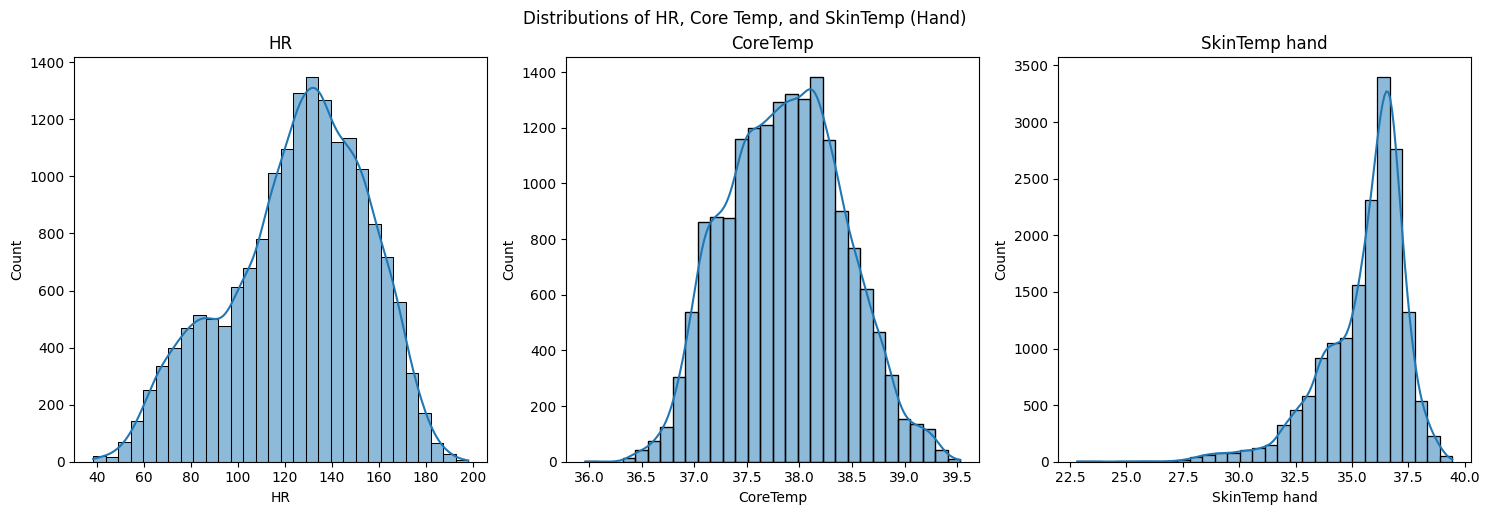

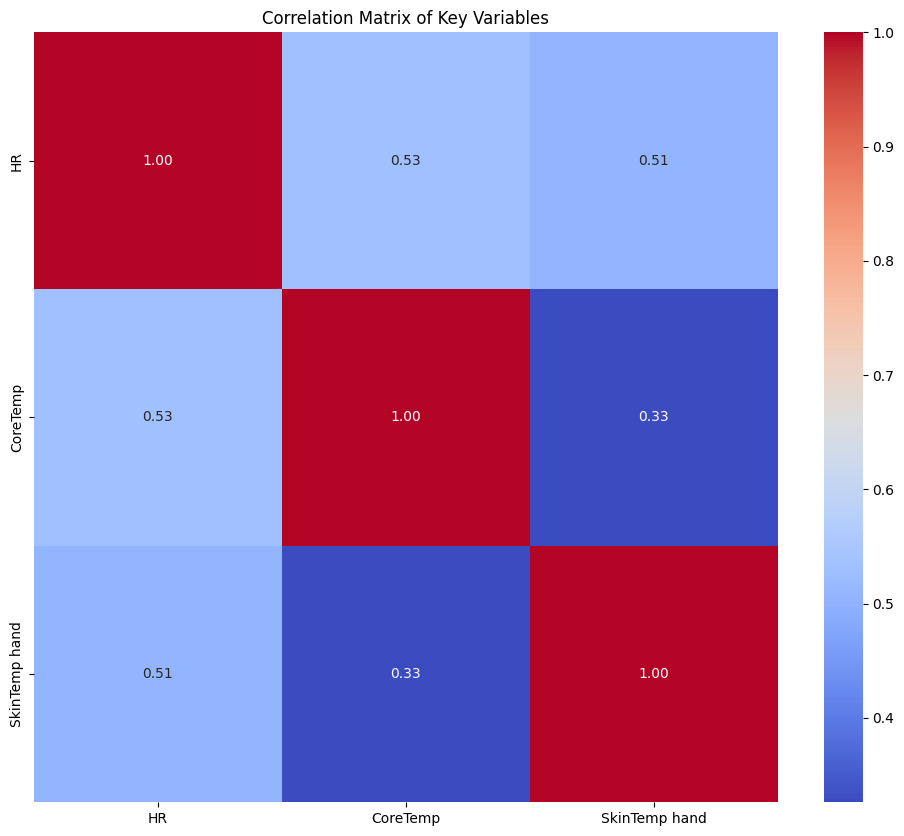


Time Series Analysis:
|        | 0         |
|:-------|:----------|
| (1, 1) | (0, True) |
| (1, 2) | (0, True) |
| (1, 3) | (0, True) |
| (2, 1) | (0, True) |
| (2, 2) | (0, True) |
| (2, 3) | (0, True) |
| (3, 1) | (0, True) |
| (3, 2) | (0, True) |
| (3, 3) | (0, True) |
| (4, 1) | (0, True) |


<ipython-input-38-f178fcda2c77>:61: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  time_series_analysis = data.groupby(["Participant", "Condition"]).apply(


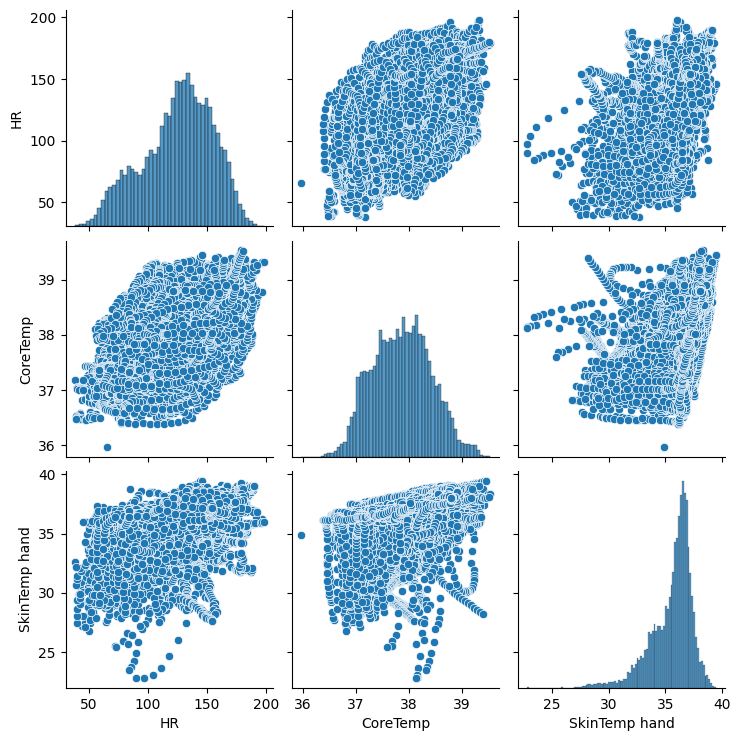


Outliers in SkinTemp Columns:
SkinTemp hand: 583 outliers


<ipython-input-38-f178fcda2c77>:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["Time"] = pd.to_datetime(subset["Time"], format='%H:%M:%S')  # Adjust format if needed


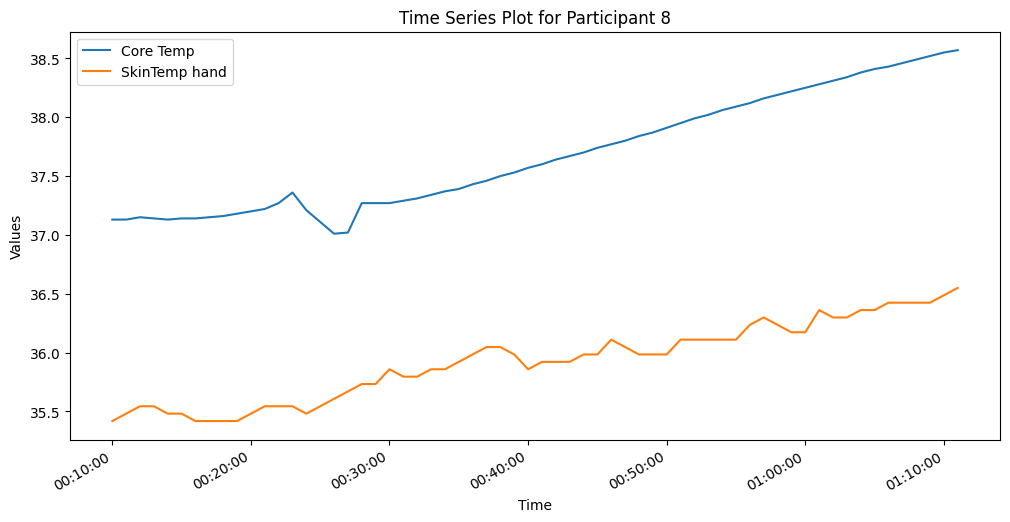

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.dates as mdates


# Replace 'old_column_name' with 'new_column_name'
data = data.rename(columns={'Corerectal': 'CoreTemp'})


# Subset of columns of interest
key_columns = [
    "Participant", "Condition", "Time", "HR", "SkinTemp abdomen", "SkinTemp calf",
    "SkinTemp chest", "SkinTemp foot", "SkinTemp hand", "SkinTemp head",
    "SkinTemp lower arm", "SkinTemp lower back", "SkinTemp thigh", "SkinTemp upper arm",
    "SkinTemp upper back", "CoreTemp", "Δcore"
]

# Check basic statistics
print("Basic Statistics:")
print(data[key_columns].describe(include='all').to_markdown())

# Missing data summary
print("\nMissing Data Summary:")
missing_data = data[key_columns].isna().sum()
print(missing_data[missing_data > 0].sort_values(ascending=False).to_markdown())

# Distribution plots for key variables
def plot_distributions(df, cols, title="Distribution Plots"):
    plt.figure(figsize=(15, 5))
    for i, col in enumerate(cols, 1):
        plt.subplot(1, len(cols), i)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(col)
        plt.tight_layout()
    plt.suptitle(title, y=1.02)
    plt.show()

plot_distributions(data, ["HR", "CoreTemp", "SkinTemp hand"], title="Distributions of HR, Core Temp, and SkinTemp (Hand)")

# Correlation heatmap for key numerical columns
'''
numerical_cols = [
    "HR", "CoreTemp", "Δcore", "SkinTemp abdomen", "SkinTemp calf", "SkinTemp chest",
    "SkinTemp foot", "SkinTemp hand", "SkinTemp head", "SkinTemp lower arm",
    "SkinTemp lower back", "SkinTemp thigh", "SkinTemp upper arm", "SkinTemp upper back"
]
'''
numerical_cols = [
    "HR", "CoreTemp", "SkinTemp hand"
]
correlation_matrix = data[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Key Variables")
plt.show()

# Check time series consistency
print("\nTime Series Analysis:")
time_series_analysis = data.groupby(["Participant", "Condition"]).apply(
    lambda x: (x["Time"].duplicated().sum(), x["Time"].is_monotonic_increasing)
)
time_series_analysis.columns = ["Duplicate Time Count", "Is Time Monotonic"]
print(time_series_analysis.head(10).to_markdown())

# Pairplots for Core Temperature and HR vs. SkinTemps
sns.pairplot(data, vars=["HR", "CoreTemp", "SkinTemp hand"])
plt.show()

# Check for outliers in SkinTemp columns
print("\nOutliers in SkinTemp Columns:")
for col in [col for col in numerical_cols if "SkinTemp" in col]:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    outliers = data[(data[col] < (q1 - 1.5 * iqr)) | (data[col] > (q3 + 1.5 * iqr))]
    print(f"{col}: {len(outliers)} outliers")

# Visualize trends over time for one participant and condition
#participant = data["Participant"].iloc[0]
#condition = data["Condition"].iloc[0]
#subset = data[(data["Participant"] == participant) & (data["Condition"] == condition)]
# Visualize trends over time for one participant and condition
participant = data["Participant"].iloc[0]
condition = data["Condition"].iloc[0]
subset = data[(data["Participant"] == 8) & (data["Condition"] == 2) & (data["Activity code"] == 5)]



import matplotlib.dates as mdates

# Convert 'Time' to datetime for proper formatting
subset["Time"] = pd.to_datetime(subset["Time"], format='%H:%M:%S')  # Adjust format if needed

plt.figure(figsize=(12, 6))
for col, name in zip(["CoreTemp", "SkinTemp hand"], ["Core Temp", "SkinTemp hand"]):
    plt.plot(subset["Time"], subset[col], label=name)

plt.xlabel("Time")
plt.ylabel("Values")
plt.title(f"Time Series Plot for Participant 8")
plt.legend()

# Format x-axis for 20-minute intervals
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.gcf().autofmt_xdate()

plt.show()



In [18]:
data = data.rename(columns={'CoreTemp': 'Corerectal'})

In [19]:
# Group by Participant, Condition, and Activity Code to count data points
highest_data_points = data.groupby(['Participant', 'Condition', 'Activity code']).size().reset_index(name='Count')

# Sort by Count in descending order to find the combination with the most data points
highest_data_points_sorted = highest_data_points.sort_values(by='Count', ascending=False)

# Display the top combinations
print("Top Participant, Condition, Activity Combinations by Data Points:")
print(highest_data_points_sorted.head(10))

Top Participant, Condition, Activity Combinations by Data Points:
     Participant  Condition  Activity code  Count
119            8          2              5     62
101            7          2              5     62
89             6          2              5     62
284           18          1              5     61
177           11          3              5     61
29             2          3              5     61
273           17          2              5     61
278           17          3              5     61
211           13          3              5     61
290           18          2              5     61


###Kalman

In [32]:
# Subset the dataset
subset_data = data[
    (data['Participant'] == 8) &
    (data['Condition'] == 2) &
    (data['Activity code'] == 5)
].copy()

# Extract relevant columns
columns_to_use = ["Participant", "Condition", "Time", "HR", "SkinTemp hand", "Corerectal"]
data_subset = subset_data[columns_to_use].copy()

# Convert 'Time' column to datetime for better handling
data_subset["Time"] = pd.to_datetime(data_subset["Time"], format='%H:%M:%S')

# Drop missing values (ensure clean data)
data_subset = data_subset.dropna().reset_index(drop=True)

print("Subset Data Preview:")
print(data_subset.head())

Subset Data Preview:
   Participant  Condition                Time    HR  SkinTemp hand  Corerectal
0            8          2 1900-01-01 00:10:00  71.0        35.4179       37.13
1            8          2 1900-01-01 00:11:00  74.6        35.4808       37.13
2            8          2 1900-01-01 00:12:00  78.2        35.5436       37.15
3            8          2 1900-01-01 00:13:00  81.8        35.5436       37.14
4            8          2 1900-01-01 00:14:00  85.4        35.4808       37.13


In [33]:
import numpy as np

# State Vector: Core Temp (Corerectal)
# Observations: HR and SkinTemp hand
state_dim = 1  # Only Core Temperature
obs_dim = 2    # HR and SkinTemp

# Define transition matrix (identity, no process dynamics assumed here for simplicity)
F = np.eye(state_dim)  # State Transition Matrix
# Observation Matrix (maps state to observation space)
H = np.array([[0.5],  # Weight for HR
              [0.5]])  # Weight for SkinTemp hand (adjust based on the relative importance)

# Process and Measurement Noise Covariances
Q = np.array([[1e-4]])  # Process noise covariance
R = np.diag([1e-1, 1e-2])  # Variances for HR and SkinTemp hand

# Initialize state vector and covariance
X = np.array([[36.5]])  # Initial core temperature guess
P = np.eye(state_dim)  # Initial covariance matrix

# Kalman Filter Functions (no changes needed)
def kalman_predict(X, P, F, Q):
    X_pred = F @ X
    P_pred = F @ P @ F.T + Q
    return X_pred, P_pred

def kalman_update(X_pred, P_pred, Y, H, R):
    Y = np.array(Y).reshape(-1, 1)  # Ensure column vector for observations
    S = H @ P_pred @ H.T + R  # Innovation covariance (dim: [2x2])
    K = P_pred @ H.T @ np.linalg.inv(S)  # Kalman Gain (dim: [1x2])
    Y_pred = H @ X_pred  # Predicted observation (dim: [2x1])
    X_updated = X_pred + K @ (Y - Y_pred)  # Update state (dim: [1x1])
    P_updated = (np.eye(len(P_pred)) - K @ H) @ P_pred  # Update covariance (dim: [1x1])
    return X_updated, P_updated, K


In [34]:
from sklearn.linear_model import LinearRegression

# Extract data for regression to estimate weights
X_obs = data_subset[["HR", "SkinTemp hand"]]
y_obs = data_subset["Corerectal"]

# Fit a regression model to estimate the relationship
model = LinearRegression().fit(X_obs, y_obs)
print("Observation Weights (H):", model.coef_)

# Update H based on regression coefficients
H = np.array([model.coef_]).T  # Shape: [2x1]

# Update Q and R
Q = np.array([[np.var(data_subset["Corerectal"]) * 1e-3]])  # Process noise covariance
R = np.diag([
    np.var(data_subset["HR"]) * 1e-1,        # Measurement noise for HR
    np.var(data_subset["SkinTemp hand"]) * 1e-1  # Measurement noise for SkinTemp hand
])

Observation Weights (H): [0.00765598 1.05417782]


In [35]:
# Normalize features
data_subset["HR"] = (data_subset["HR"] - data_subset["HR"].mean()) / data_subset["HR"].std()
data_subset["SkinTemp hand"] = (data_subset["SkinTemp hand"] - data_subset["SkinTemp hand"].mean()) / data_subset["SkinTemp hand"].std()
data_subset["Corerectal"] = (data_subset["Corerectal"] - data_subset["Corerectal"].mean()) / data_subset["Corerectal"].std()

In [36]:
# Initialize state vector and covariance matrix
X = np.array([[0]])  # Start with normalized core temp (mean = 0 after normalization)
P = np.eye(1)        # Initial covariance matrix

# Store results
core_temp_estimates = []
timestamps = []

# Iterate through each time step
for _, row in data_subset.iterrows():
    # Observations (normalized HR and SkinTemp hand)
    Y = [row["HR"], row["SkinTemp hand"]]

    # Prediction step
    X_pred, P_pred = kalman_predict(X, P, F, Q)

    # Update step
    X, P, K = kalman_update(X_pred, P_pred, Y, H, R)

    # Store results
    core_temp_estimates.append(X[0, 0])
    timestamps.append(row["Time"])

# Add Kalman estimates back to the dataset
data_subset["CoreTemp_Estimate"] = core_temp_estimates

# De-normalize the results
data_subset["CoreTemp_Estimate"] = (
    data_subset["CoreTemp_Estimate"] * data_subset["Corerectal"].std() +
    data_subset["Corerectal"].mean()
)

# Use original mean and std of Corerectal
corerectal_mean = data["Corerectal"].mean()  # From the original dataset
corerectal_std = data["Corerectal"].std()    # From the original dataset

# De-normalize both columns
data_subset["CoreTemp_Estimate"] = (
    data_subset["CoreTemp_Estimate"] * corerectal_std + corerectal_mean
)
data_subset["Corerectal"] = (
    data_subset["Corerectal"] * corerectal_std + corerectal_mean
)

# Restore the original HR and SkinTemp hand values from the original dataset
data_subset["HR"] = subset_data["HR"].values
data_subset["SkinTemp hand"] = subset_data["SkinTemp hand"].values



print("Kalman Filtering Complete. Subset Data with De-Normalized Estimates:")
print(data_subset.head())

Kalman Filtering Complete. Subset Data with De-Normalized Estimates:
   Participant  Condition                Time    HR  SkinTemp hand  Corerectal  CoreTemp_Estimate
0            8          2 1900-01-01 00:10:00  71.0        35.4179   37.243037          37.068204
1            8          2 1900-01-01 00:11:00  74.6        35.4808   37.243037          37.114637
2            8          2 1900-01-01 00:12:00  78.2        35.5436   37.265754          37.164938
3            8          2 1900-01-01 00:13:00  81.8        35.5436   37.254395          37.190660
4            8          2 1900-01-01 00:14:00  85.4        35.4808   37.243037          37.183785


Mean Absolute Error (MAE): 0.1623
Root Mean Squared Error (RMSE): 0.1936
Mean Absolute Percentage Error (MAPE): 0.43%
R² Score: 0.8768


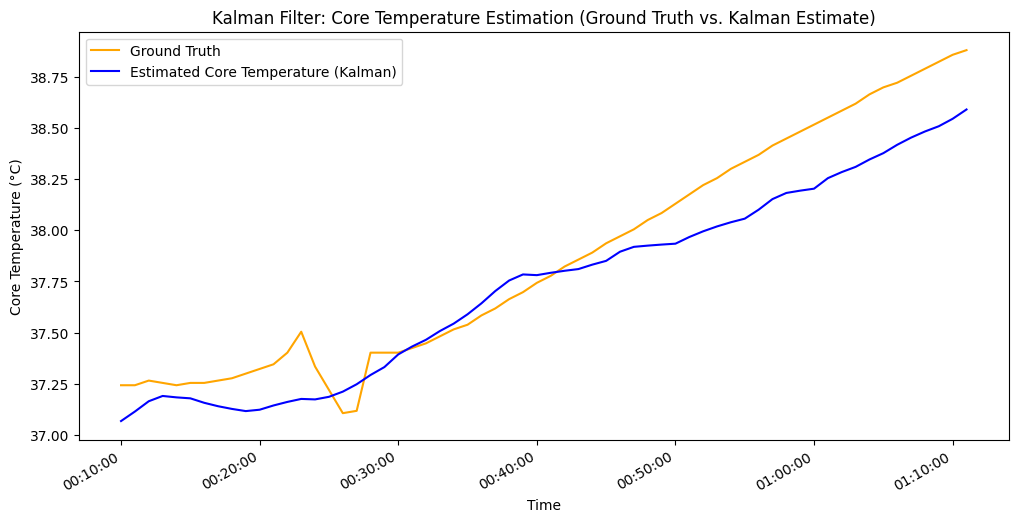

In [37]:
# Calculate metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(data_subset["Corerectal"], data_subset["CoreTemp_Estimate"])
rmse = np.sqrt(mean_squared_error(data_subset["Corerectal"], data_subset["CoreTemp_Estimate"]))
mape = np.mean(np.abs((data_subset["Corerectal"] - data_subset["CoreTemp_Estimate"]) / data_subset["Corerectal"])) * 100
r2 = r2_score(data_subset["Corerectal"], data_subset["CoreTemp_Estimate"])

# Print metrics
#print(f"Metrics for Participant {combo['Participant']}, Condition {combo['Condition']}, Activity {combo['Activity code']}:")
#print(f"Metrics for Participant {combo['Participant']}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R² Score: {r2:.4f}")



import matplotlib.dates as mdates

# Convert Time to datetime for plotting
timestamps = pd.to_datetime(data_subset["Time"], format='%H:%M:%S')

plt.figure(figsize=(12, 6))
plt.plot(timestamps, data_subset["Corerectal"], label="Ground Truth ", color='orange')
plt.plot(timestamps, data_subset["CoreTemp_Estimate"], label="Estimated Core Temperature (Kalman)", color='blue')
plt.xlabel("Time")
plt.ylabel("Core Temperature (°C)")
plt.title("Kalman Filter: Core Temperature Estimation (Ground Truth vs. Kalman Estimate)")
plt.legend()

# Format x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.gcf().autofmt_xdate()

plt.show()

Metrics for Participant 8
Mean Absolute Error (MAE): 0.3886
Root Mean Squared Error (RMSE): 0.4275
Mean Absolute Percentage Error (MAPE): 1.04%
R² Score: 0.2248


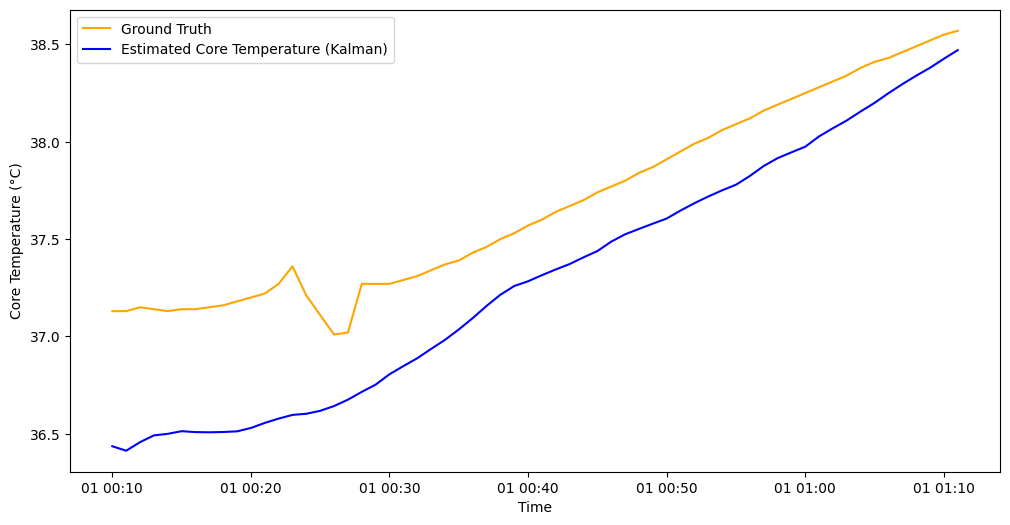

Metrics for Participant 7
Mean Absolute Error (MAE): 0.3057
Root Mean Squared Error (RMSE): 0.3428
Mean Absolute Percentage Error (MAPE): 0.80%
R² Score: 0.5520


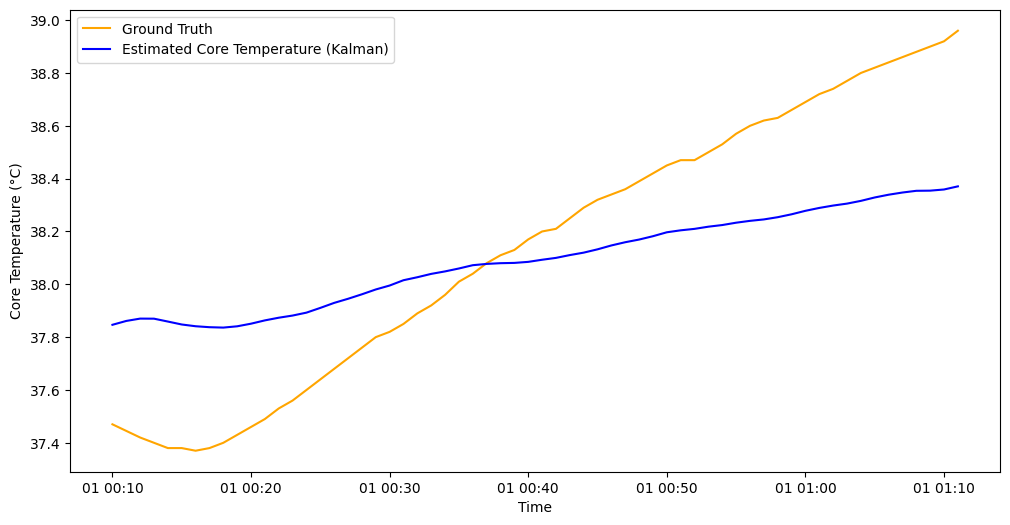

Metrics for Participant 6
Mean Absolute Error (MAE): 0.2485
Root Mean Squared Error (RMSE): 0.2800
Mean Absolute Percentage Error (MAPE): 0.65%
R² Score: 0.8432


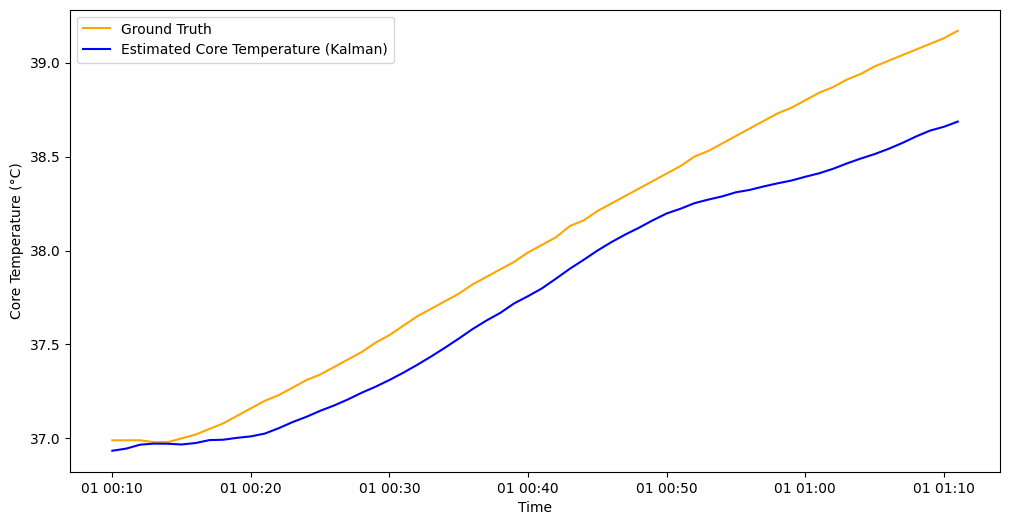

Metrics for Participant 18
Mean Absolute Error (MAE): 0.3436
Root Mean Squared Error (RMSE): 0.3618
Mean Absolute Percentage Error (MAPE): 0.92%
R² Score: 0.5508


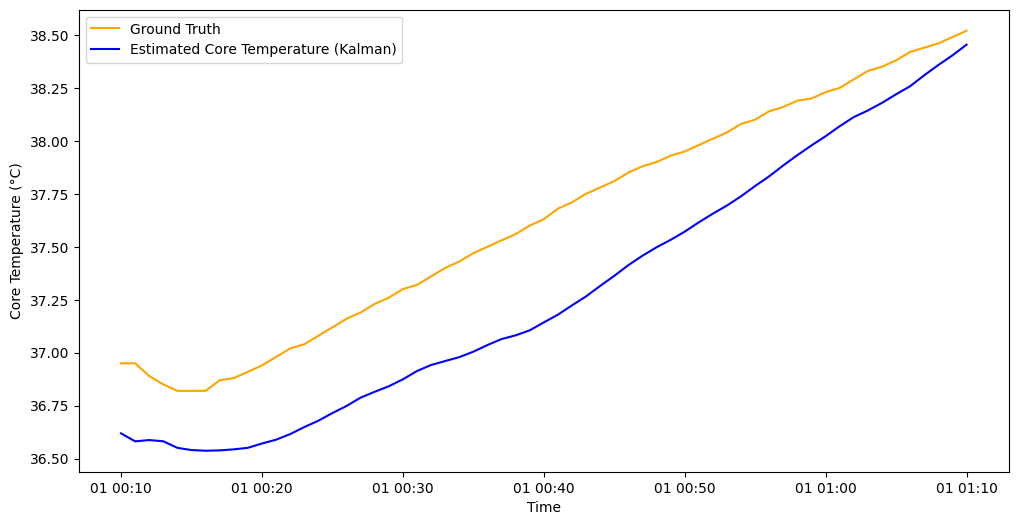

Metrics for Participant 11
Mean Absolute Error (MAE): 0.2176
Root Mean Squared Error (RMSE): 0.2270
Mean Absolute Percentage Error (MAPE): 0.57%
R² Score: 0.6484


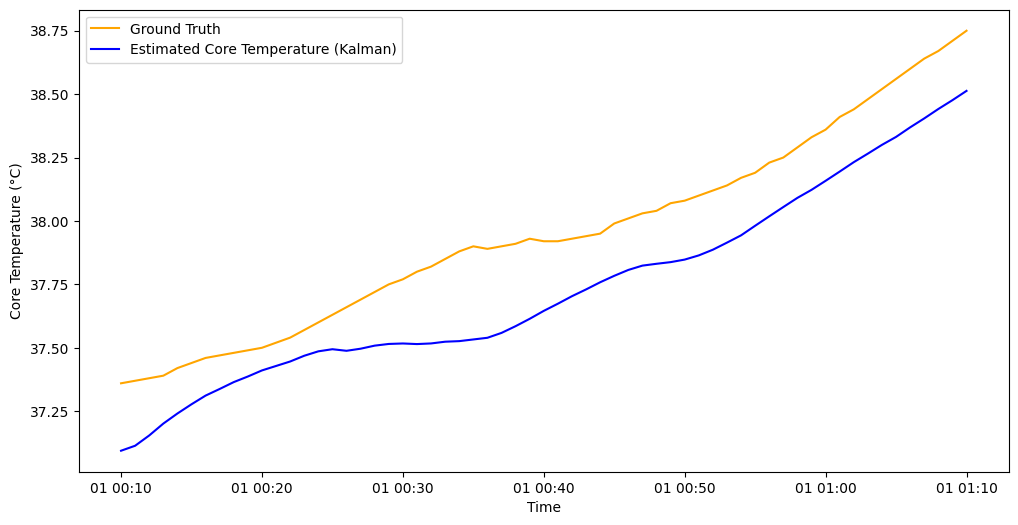

Metrics for Participant 2
Mean Absolute Error (MAE): 0.3301
Root Mean Squared Error (RMSE): 0.3963
Mean Absolute Percentage Error (MAPE): 0.88%
R² Score: -0.2152


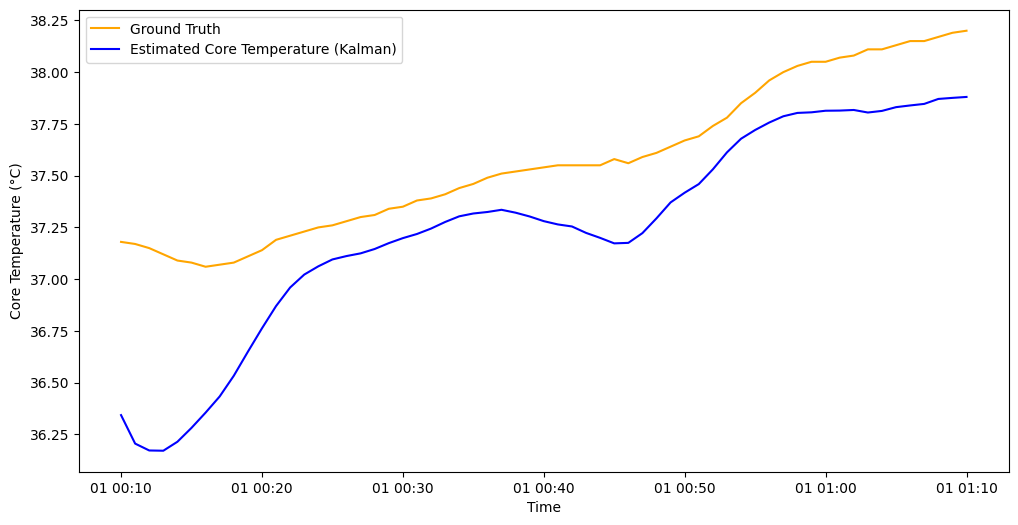

Metrics for Participant 17
Mean Absolute Error (MAE): 0.3524
Root Mean Squared Error (RMSE): 0.4034
Mean Absolute Percentage Error (MAPE): 0.94%
R² Score: 0.0508


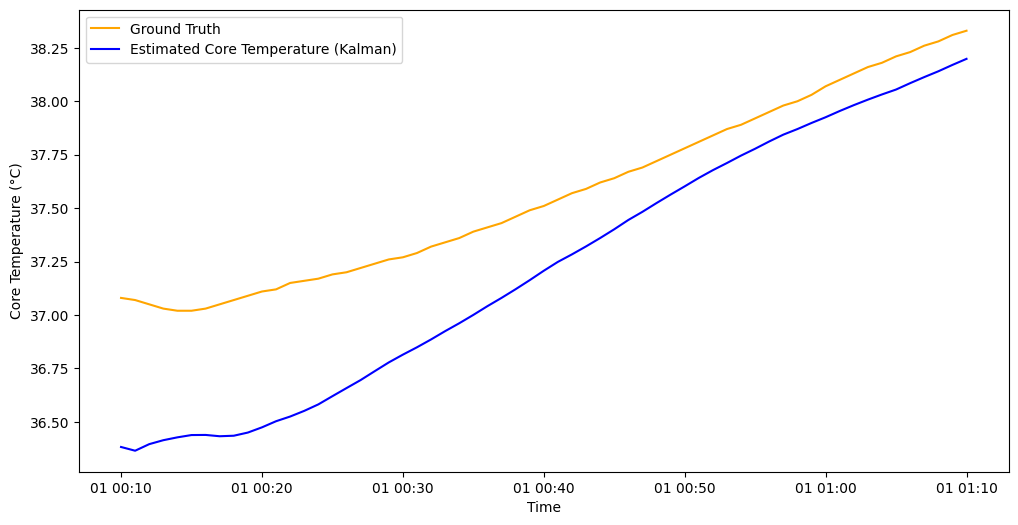

Metrics for Participant 17
Mean Absolute Error (MAE): 0.2463
Root Mean Squared Error (RMSE): 0.2560
Mean Absolute Percentage Error (MAPE): 0.65%
R² Score: 0.5943


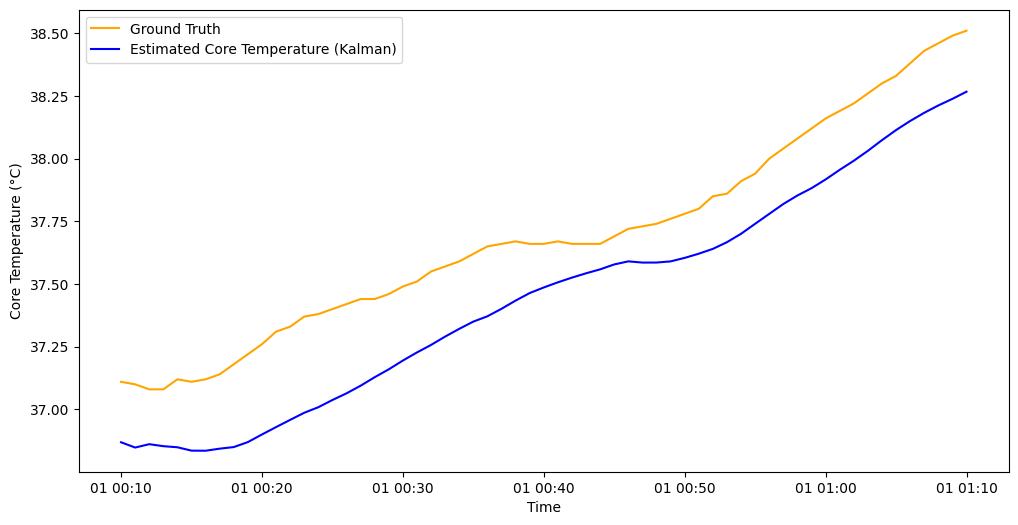

Metrics for Participant 13
Mean Absolute Error (MAE): 0.3468
Root Mean Squared Error (RMSE): 0.4280
Mean Absolute Percentage Error (MAPE): 0.93%
R² Score: -0.2537


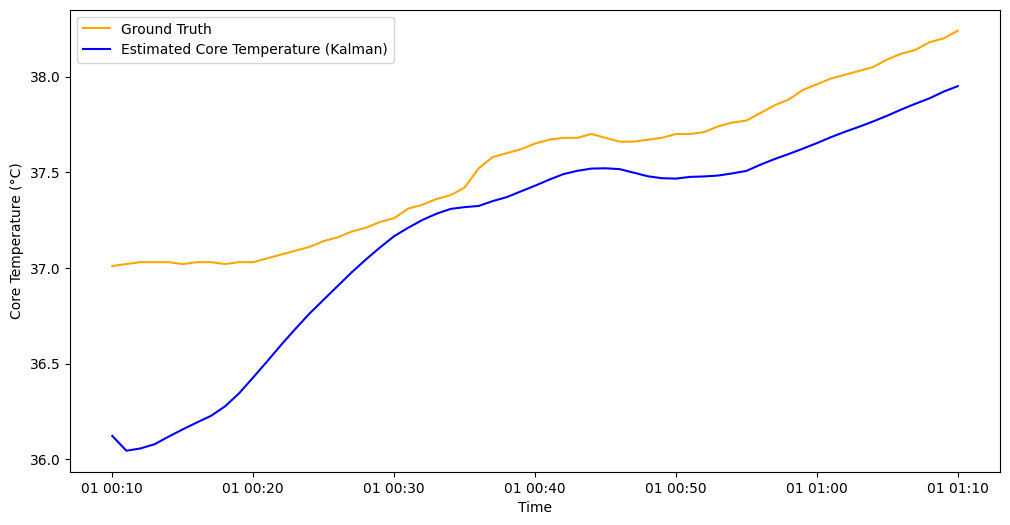

Metrics for Participant 18
Mean Absolute Error (MAE): 0.1940
Root Mean Squared Error (RMSE): 0.2283
Mean Absolute Percentage Error (MAPE): 0.51%
R² Score: 0.8095


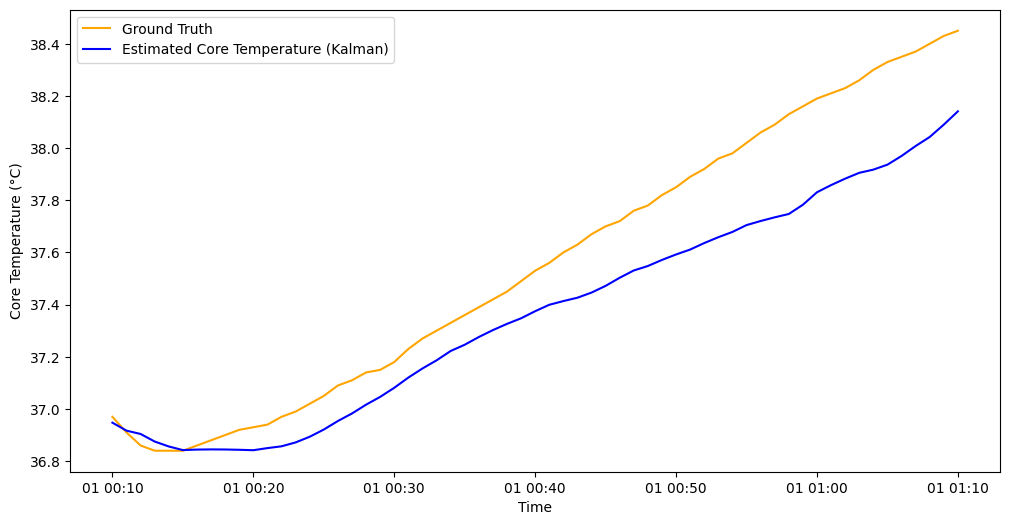

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Define the top combinations
top_combinations = [
    {"Participant": 8, "Condition": 2, "Activity code": 5},
    {"Participant": 7, "Condition": 2, "Activity code": 5},
    {"Participant": 6, "Condition": 2, "Activity code": 5},
    {"Participant": 18, "Condition": 1, "Activity code": 5},
    {"Participant": 11, "Condition": 3, "Activity code": 5},
    {"Participant": 2, "Condition": 3, "Activity code": 5},
    {"Participant": 17, "Condition": 2, "Activity code": 5},
    {"Participant": 17, "Condition": 3, "Activity code": 5},
    {"Participant": 13, "Condition": 3, "Activity code": 5},
    {"Participant": 18, "Condition": 2, "Activity code": 5},
]

# Loop through each combination
results = []

for combo in top_combinations:
    # Subset the dataset
    subset_data = data[
        (data['Participant'] == combo["Participant"]) &
        (data['Condition'] == combo["Condition"]) &
        (data['Activity code'] == combo["Activity code"])
    ].copy()

    # Extract relevant columns
    columns_to_use = ["Participant", "Condition", "Time", "HR", "SkinTemp hand", "Corerectal"]
    data_subset = subset_data[columns_to_use].copy()
    data_subset["Time"] = pd.to_datetime(data_subset["Time"], format='%H:%M:%S')
    data_subset = data_subset.dropna().reset_index(drop=True)

    # Normalize data
    data_subset["HR"] = (data_subset["HR"] - data_subset["HR"].mean()) / data_subset["HR"].std()
    data_subset["SkinTemp hand"] = (data_subset["SkinTemp hand"] - data_subset["SkinTemp hand"].mean()) / data_subset["SkinTemp hand"].std()
    data_subset["Corerectal"] = (data_subset["Corerectal"] - data_subset["Corerectal"].mean()) / data_subset["Corerectal"].std()

    # Initialize Kalman filter parameters
    F = np.eye(1)
    model = LinearRegression().fit(data_subset[["HR", "SkinTemp hand"]], data_subset["Corerectal"])
    H = np.array([model.coef_]).T
    Q = np.array([[np.var(data_subset["Corerectal"]) * 1e-3]])
    R = np.diag([np.var(data_subset["HR"]) * 1e-1, np.var(data_subset["SkinTemp hand"]) * 1e-1])
    X = np.array([[0]])
    P = np.eye(1)

    # Kalman filtering
    core_temp_estimates = []
    for _, row in data_subset.iterrows():
        Y = [row["HR"], row["SkinTemp hand"]]
        X_pred, P_pred = kalman_predict(X, P, F, Q)
        X, P, K = kalman_update(X_pred, P_pred, Y, H, R)
        core_temp_estimates.append(X[0, 0])

    # De-normalize estimates
    corerectal_mean = subset_data["Corerectal"].mean()
    corerectal_std = subset_data["Corerectal"].std()
    data_subset["CoreTemp_Estimate"] = (np.array(core_temp_estimates) * corerectal_std) + corerectal_mean
    data_subset["Corerectal"] = (data_subset["Corerectal"] * corerectal_std) + corerectal_mean

    # Store results
    results.append({
        "Participant": combo["Participant"],
        "Condition": combo["Condition"],
        "Activity code": combo["Activity code"],
        "Data": data_subset,
    })


    # Calculate metrics
    mae = mean_absolute_error(data_subset["Corerectal"], data_subset["CoreTemp_Estimate"])
    rmse = np.sqrt(mean_squared_error(data_subset["Corerectal"], data_subset["CoreTemp_Estimate"]))
    mape = np.mean(np.abs((data_subset["Corerectal"] - data_subset["CoreTemp_Estimate"]) / data_subset["Corerectal"])) * 100
    r2 = r2_score(data_subset["Corerectal"], data_subset["CoreTemp_Estimate"])

    # Print metrics
    #print(f"Metrics for Participant {combo['Participant']}, Condition {combo['Condition']}, Activity {combo['Activity code']}:")
    print(f"Metrics for Participant {combo['Participant']}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"R² Score: {r2:.4f}")

    # Store metrics in the results for further analysis if needed
    results.append({
        "Participant": combo["Participant"],
        "Condition": combo["Condition"],
        "Activity code": combo["Activity code"],
        "MAE": mae,
        "RMSE": rmse,
        "MAPE": mape,
        "R2": r2,
        "Data": data_subset
    })


    # Plot for this combination
    plt.figure(figsize=(12, 6))
    plt.plot(data_subset["Time"], data_subset["Corerectal"], label="Ground Truth", color='orange')
    plt.plot(data_subset["Time"], data_subset["CoreTemp_Estimate"], label="Estimated Core Temperature (Kalman)", color='blue')
    plt.xlabel("Time")
    plt.ylabel("Core Temperature (°C)")
    #plt.title(f"Core Temperature Estimation for Participant {combo['Participant']}, Condition {combo['Condition']}, Activity {combo['Activity code']}")
    plt.legend()
    plt.show()

# Results contain all the processed data subsets for further analysis

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define function to process a single combination
def process_combination(participant, condition, activity_code, data):
    try:
        # Subset the dataset
        subset_data = data[
            (data['Participant'] == participant) &
            (data['Condition'] == condition) &
            (data['Activity code'] == activity_code)
        ].copy()

        # Extract relevant columns
        columns_to_use = ["Participant", "Condition", "Time", "HR", "SkinTemp hand", "Corerectal"]
        data_subset = subset_data[columns_to_use].copy()
        data_subset["Time"] = pd.to_datetime(data_subset["Time"], format='%H:%M:%S')
        data_subset = data_subset.dropna().reset_index(drop=True)

        if data_subset.empty:
            print(f"Skipping Participant {participant}, Condition {condition}, Activity {activity_code} due to insufficient data.")
            return None

        # Normalize data
        data_subset["HR"] = (data_subset["HR"] - data_subset["HR"].mean()) / data_subset["HR"].std()
        data_subset["SkinTemp hand"] = (data_subset["SkinTemp hand"] - data_subset["SkinTemp hand"].mean()) / data_subset["SkinTemp hand"].std()
        data_subset["Corerectal"] = (data_subset["Corerectal"] - data_subset["Corerectal"].mean()) / data_subset["Corerectal"].std()

        # Initialize Kalman filter parameters
        F = np.eye(1)
        model = LinearRegression().fit(data_subset[["HR", "SkinTemp hand"]], data_subset["Corerectal"])
        H = np.array([model.coef_]).T
        Q = np.array([[np.var(data_subset["Corerectal"]) * 1e-3]])
        R = np.diag([np.var(data_subset["HR"]) * 1e-1, np.var(data_subset["SkinTemp hand"]) * 1e-1])
        X = np.array([[0]])
        P = np.eye(1)

        # Kalman filtering
        core_temp_estimates = []
        for _, row in data_subset.iterrows():
            Y = [row["HR"], row["SkinTemp hand"]]
            try:
                X_pred, P_pred = kalman_predict(X, P, F, Q)
                X, P, K = kalman_update(X_pred, P_pred, Y, H, R)
                core_temp_estimates.append(X[0, 0])
            except np.linalg.LinAlgError:
                print(f"Skipping Participant {participant}, Condition {condition}, Activity {activity_code} due to singular matrix.")
                return None

        # De-normalize estimates
        corerectal_mean = subset_data["Corerectal"].mean()
        corerectal_std = subset_data["Corerectal"].std()
        data_subset["CoreTemp_Estimate"] = (np.array(core_temp_estimates) * corerectal_std) + corerectal_mean
        data_subset["Corerectal"] = (data_subset["Corerectal"] * corerectal_std) + corerectal_mean

        # Metrics
        mae = mean_absolute_error(data_subset["Corerectal"], data_subset["CoreTemp_Estimate"])
        rmse = np.sqrt(mean_squared_error(data_subset["Corerectal"], data_subset["CoreTemp_Estimate"]))
        mape = np.mean(np.abs((data_subset["Corerectal"] - data_subset["CoreTemp_Estimate"]) / data_subset["Corerectal"])) * 100
        r2 = r2_score(data_subset["Corerectal"], data_subset["CoreTemp_Estimate"])

        return {
            "Participant": participant,
            "Condition": condition,
            "Activity code": activity_code,
            "MAE": mae,
            "RMSE": rmse,
            "MAPE": mape,
            "R2": r2,
            "Data": data_subset,
        }

    except Exception as e:
        #print(f"Skipping Participant {participant}, Condition {condition}, Activity {activity_code} due to error: {e}")
        return None

# Loop through all unique combinations
results = []
unique_combinations = data[["Participant", "Condition", "Activity code"]].drop_duplicates()


for _, row in unique_combinations.iterrows():
    result = process_combination(row["Participant"], row["Condition"], row["Activity code"], data)
    if result is not None:
        results.append(result)

# Save results to CSV if needed
# Combine all processed data into a single DataFrame
all_results_data = pd.concat([result["Data"] for result in results if result is not None], ignore_index=True)

# Save the combined DataFrame to a single CSV file
all_results_data.to_csv("Kalman_Filter_Results.csv", index=False)



Skipping Participant 4, Condition 2, Activity 7 due to singular matrix.


#Extended Kalman Filter

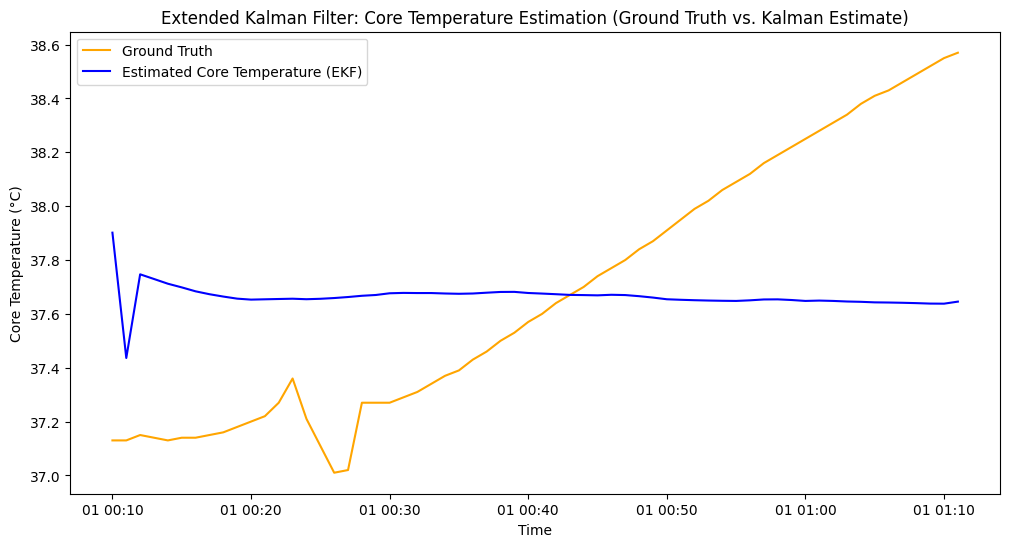

   Participant  Condition                Time        HR  SkinTemp hand  Corerectal  CoreTemp_Estimate
0            8          2 1900-01-01 00:10:00 -2.480734      -1.531304       37.13          37.901646
1            8          2 1900-01-01 00:11:00 -2.249196      -1.341731       37.13          37.436200
2            8          2 1900-01-01 00:12:00 -2.017658      -1.152459       37.15          37.746941
3            8          2 1900-01-01 00:13:00 -1.786120      -1.152459       37.14          37.729569
4            8          2 1900-01-01 00:14:00 -1.554583      -1.341731       37.13          37.712015
Metrics: {'MAE': 0.4416341970013678, 'RMSE': 0.5007335772363916, 'MAPE': 1.1694384104871662, 'R2': -0.06343612852056757}


In [29]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from scipy.linalg import block_diag

def extended_kalman_filter(data, participant, condition, activity_code):
    """
    Extended Kalman Filter for a specific Participant, Condition, and Activity code.

    Parameters:
        data (pd.DataFrame): Cleaned dataset.
        participant (int): Participant ID.
        condition (int): Condition ID.
        activity_code (int): Activity code.

    Returns:
        pd.DataFrame: DataFrame with Core Temperature Estimates and ground truth for visualization and evaluation.
        dict: Dictionary of metrics (MAE, RMSE, MAPE, R2 Score).
    """
    # Subset the dataset
    subset_data = data[
        (data["Participant"] == participant) &
        (data["Condition"] == condition) &
        (data["Activity code"] == activity_code)
    ].copy()

    # Extract relevant columns
    columns_to_use = ["Participant", "Condition", "Time", "HR", "SkinTemp hand", "Corerectal"]
    data_subset = subset_data[columns_to_use].copy()

    # Convert 'Time' to datetime
    data_subset["Time"] = pd.to_datetime(data_subset["Time"], format='%H:%M:%S')

    # Drop missing values
    data_subset = data_subset.dropna().reset_index(drop=True)


    # Normalize data
    data_subset["HR"] = (data_subset["HR"] - data_subset["HR"].mean()) / data_subset["HR"].std()
    data_subset["SkinTemp hand"] = (data_subset["SkinTemp hand"] - data_subset["SkinTemp hand"].mean()) / data_subset["SkinTemp hand"].std()
    data_subset["Corerectal"] = (data_subset["Corerectal"] - data_subset["Corerectal"].mean()) / data_subset["Corerectal"].std()

    # Define nonlinear observation function (h(x))
    def h(x):
        """
        Nonlinear observation function.
        x: state (Core temperature)
        Returns: HR and SkinTemp hand
        """
        return np.array([2 * x**2 - x, np.sin(x)])

    # Define Jacobian of h(x) (H_t)
    def jacobian_h(x):
        """
        Jacobian of h(x).
        x: state (Core temperature)
        Returns: Jacobian matrix H_t
        """
        return np.array([
            [4 * x - 1],  # Partial derivative of HR w.r.t x
            [np.cos(x)]   # Partial derivative of SkinTemp hand w.r.t x
        ])

    # Kalman Filter Initialization
    X = np.array([[0]])  # Start with normalized core temp (mean = 0 after normalization)
    P = np.eye(1)        # Initial covariance matrix
    F = np.eye(1)        # State transition matrix (linear)

    Q = np.array([[1e-4]])  # Process noise covariance
    R = block_diag(0.1, 0.1)  # Measurement noise covariance

    core_temp_estimates = []
    for _, row in data_subset.iterrows():
        # Prediction Step
        X_pred = F @ X
        P_pred = F @ P @ F.T + Q

        # Observation
        Y = np.array([row["HR"], row["SkinTemp hand"]])

        # Linearization of observation function (Jacobian H_t)
        H_t = jacobian_h(X_pred[0, 0])

        # Predicted Observation
        Y_pred = h(X_pred[0, 0])

        # Innovation covariance
        S = H_t @ P_pred @ H_t.T + R

        # Kalman Gain
        K = P_pred @ H_t.T @ np.linalg.inv(S)

        # Update Step
        X = X_pred + K @ (Y - Y_pred)
        P = (np.eye(len(P_pred)) - K @ H_t) @ P_pred

        # Store the estimate
        core_temp_estimates.append(X[0, 0])

    # De-normalize results
    #data_subset["CoreTemp_Estimate"] = (np.array(core_temp_estimates) * core_temp_std) + core_temp_mean
    #data_subset["Corerectal"] = (data_subset["Corerectal"] * core_temp_std) + core_temp_mean

    # De-normalize estimates
    corerectal_mean = subset_data["Corerectal"].mean()
    corerectal_std = subset_data["Corerectal"].std()
    data_subset["CoreTemp_Estimate"] = (np.array(core_temp_estimates) * corerectal_std) + corerectal_mean
    data_subset["Corerectal"] = (data_subset["Corerectal"] * corerectal_std) + corerectal_mean

    # Metrics
    mae = mean_absolute_error(data_subset["Corerectal"], data_subset["CoreTemp_Estimate"])
    rmse = np.sqrt(mean_squared_error(data_subset["Corerectal"], data_subset["CoreTemp_Estimate"]))
    mape = np.mean(np.abs((data_subset["Corerectal"] - data_subset["CoreTemp_Estimate"]) / data_subset["Corerectal"])) * 100
    r2 = r2_score(data_subset["Corerectal"], data_subset["CoreTemp_Estimate"])

    metrics = {
        "MAE": mae,
        "RMSE": rmse,
        "MAPE": mape,
        "R2": r2
    }

    # Plot Results
    plt.figure(figsize=(12, 6))
    plt.plot(data_subset["Time"], data_subset["Corerectal"], label="Ground Truth", color='orange')
    plt.plot(data_subset["Time"], data_subset["CoreTemp_Estimate"], label="Estimated Core Temperature (EKF)", color='blue')
    plt.xlabel("Time")
    plt.ylabel("Core Temperature (°C)")
    plt.title("Extended Kalman Filter: Core Temperature Estimation (Ground Truth vs. Kalman Estimate)")
    plt.legend()
    plt.show()

    return data_subset, metrics

# Apply the function to the first combination
data_subset, metrics = extended_kalman_filter(data, participant=8, condition=2, activity_code=5)
print(data_subset.head())

# Display metrics
print("Metrics:", metrics)


###Window Kalman

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the window size (e.g., 5 observations)
WINDOW_SIZE = 5

def windowed_kalman_filter(subset_data):
    # Extract relevant columns
    columns_to_use = ["Participant", "Condition", "Time", "HR", "SkinTemp hand", "Corerectal"]
    data_subset = subset_data[columns_to_use].copy()
    data_subset["Time"] = pd.to_datetime(data_subset["Time"], format='%H:%M:%S')
    data_subset = data_subset.dropna().reset_index(drop=True)

    # Normalize data
    data_subset["HR"] = (data_subset["HR"] - data_subset["HR"].mean()) / data_subset["HR"].std()
    data_subset["SkinTemp hand"] = (data_subset["SkinTemp hand"] - data_subset["SkinTemp hand"].mean()) / data_subset["SkinTemp hand"].std()
    data_subset["Corerectal"] = (data_subset["Corerectal"] - data_subset["Corerectal"].mean()) / data_subset["Corerectal"].std()

    # Initialize Kalman filter parameters
    state_dim = 1  # Only Core Temperature
    obs_dim = WINDOW_SIZE * 2  # HR and SkinTemp for each observation in the window

    F = np.eye(state_dim)  # State Transition Matrix

    # Train regression model to estimate observation matrix (H)
    X_obs = data_subset[["HR", "SkinTemp hand"]]
    y_obs = data_subset["Corerectal"]
    model = LinearRegression().fit(X_obs, y_obs)
    weights = model.coef_

    H = np.zeros((obs_dim, state_dim))  # Observation Matrix for window
    for i in range(WINDOW_SIZE):
        H[i * 2:(i + 1) * 2, 0] = weights  # Repeat weights for each observation in the window

    Q = np.array([[np.var(data_subset["Corerectal"]) * 1e-3]])  # Process noise covariance
    R = np.diag(
        [np.var(data_subset["HR"]) * 1e-1] * WINDOW_SIZE +
        [np.var(data_subset["SkinTemp hand"]) * 1e-1] * WINDOW_SIZE
    )  # Measurement noise covariance

    # Initialize state vector and covariance matrix
    X = np.array([[0]])  # Normalized initial state
    P = np.eye(state_dim)

    # Store results
    core_temp_estimates = []
    timestamps = []

    # Iterate through the dataset with a sliding window
    for i in range(len(data_subset) - WINDOW_SIZE + 1):
        # Define the current window
        window = data_subset.iloc[i:i + WINDOW_SIZE]
        Y_window = np.concatenate(
            [window["HR"].values, window["SkinTemp hand"].values]
        ).reshape(-1, 1)  # Shape: [WINDOW_SIZE * 2, 1]

        # Prediction step
        X_pred = F @ X
        P_pred = F @ P @ F.T + Q

        # Update step
        H_windowed = np.tile(H.T, (WINDOW_SIZE, 1))  # Extend H for the window

        # Extend P_pred to match the size of H_windowed
        P_pred_extended = np.tile(P_pred, (H_windowed.shape[0], H_windowed.shape[1]))

        # Compute Innovation Covariance (S)
        S = H_windowed @ P_pred_extended @ H_windowed.T + R

        # Compute Kalman Gain (K)
        K = P_pred_extended @ H_windowed.T @ np.linalg.inv(S)

        # Predicted Observation (Y_pred)
        Y_pred = H_windowed @ X_pred

        # Update State Estimate (X)
        X = X_pred + K @ (Y_window.flatten() - Y_pred)

        # Update Covariance Matrix (P)
        P = (np.eye(P_pred_extended.shape[0]) - K @ H_windowed) @ P_pred_extended


        # Store the result
        core_temp_estimates.append(X[0, 0])
        timestamps.append(data_subset.iloc[i + WINDOW_SIZE - 1]["Time"])

    # De-normalize estimates
    corerectal_mean = subset_data["Corerectal"].mean()
    corerectal_std = subset_data["Corerectal"].std()
    core_temp_estimates = np.array(core_temp_estimates) * corerectal_std + corerectal_mean

    # Prepare results dataframe
    results = pd.DataFrame({
        "Time": timestamps,
        "CoreTemp_Estimate": core_temp_estimates,
        "Corerectal": data_subset["Corerectal"].iloc[WINDOW_SIZE - 1:].values * corerectal_std + corerectal_mean
    })

    # Calculate metrics
    mae = mean_absolute_error(results["Corerectal"], results["CoreTemp_Estimate"])
    rmse = np.sqrt(mean_squared_error(results["Corerectal"], results["CoreTemp_Estimate"]))
    mape = np.mean(np.abs((results["Corerectal"] - results["CoreTemp_Estimate"]) / results["Corerectal"])) * 100
    r2 = r2_score(results["Corerectal"], results["CoreTemp_Estimate"])

    metrics = {
        "MAE": mae,
        "RMSE": rmse,
        "MAPE": mape,
        "R2": r2
    }

    return results, metrics



# Example Usage
# Subset dataset for a specific participant, condition, and activity
subset_data = data[
    (data["Participant"] == 8) &
    (data["Condition"] == 2) &
    (data["Activity code"] == 5)
]

# Run windowed Kalman filter
results, metrics = windowed_kalman_filter(subset_data)

print("Windowed Kalman Filter Results:")
print(results.head())

print("Metrics:")
print(metrics)

# Visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))
plt.plot(results["Time"], results["Corerectal"], label="Ground Truth (Corerectal)", color='orange')
plt.plot(results["Time"], results["CoreTemp_Estimate"], label="Estimated Core Temperature (Windowed Kalman)", color='blue')
plt.xlabel("Time")
plt.ylabel("Core Temperature (°C)")
plt.title("Core Temperature Estimation (Windowed Kalman Filter)")
plt.legend()

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.gcf().autofmt_xdate()
plt.show()